In [3]:
import pandas as pd

# Load the La Liga matches data
la_liga_df = pd.read_excel('LaLiga_Matches_2016_2022.xlsx')

# Load the UEFA Champions League matches data
ucl_df = pd.read_excel('UEFA_MATCHES_2016_2022.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'UEFA_MATCHES_2016_2022.xlsx'

In [2]:
import pandas as pd

# Load La Liga matches data



# Print the DataFrame to verify the changes
print(la_liga_df.head())

    Season  DATE_TIME   HOME_TEAM   AWAY_TEAM  HOME_TEAM_SCORE  \
0  2015-16 2016-01-02  Ath Madrid     Levante                1   
1  2015-16 2016-01-02     Espanol   Barcelona                0   
2  2015-16 2016-01-02      Malaga       Celta                2   
3  2015-16 2016-01-03  Ath Bilbao  Las Palmas                2   
4  2015-16 2016-01-03       Betis       Eibar                0   

   AWAY_TEAM_SCORE FTR  HTHG  HTAG HTR  
0                0   H     0     0   D  
1                0   D     0     0   D  
2                0   H     2     0   H  
3                2   D     1     0   H  
4                4   A     0     2   A  


In [3]:
la_liga_df = la_liga_df.rename(columns={'FTHG': 'HOME_TEAM_SCORE', 'FTAG': 'AWAY_TEAM_SCORE', 'Date': 'DATE_TIME'})

# Replace team names
team_replacements = {
    'Ath Madrid': 'Atlético Madrid',
    'Barcelona': 'FC Barcelona',
    'Sevilla': 'Sevilla FC',
    'Valencia': 'Valencia CF',
    'Villarreal': 'Villarreal CF'
}

la_liga_df['HOME_TEAM'] = la_liga_df['HOME_TEAM'].replace(team_replacements)
la_liga_df['AWAY_TEAM'] = la_liga_df['AWAY_TEAM'].replace(team_replacements)

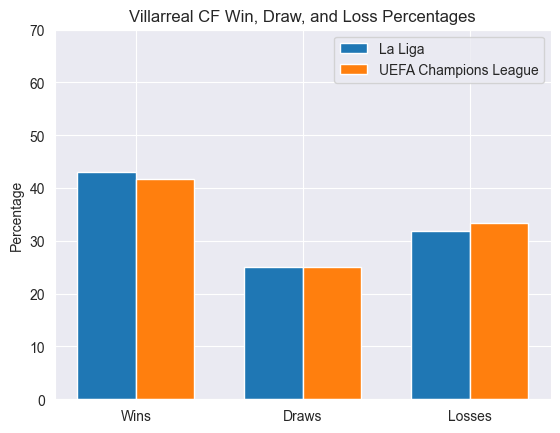

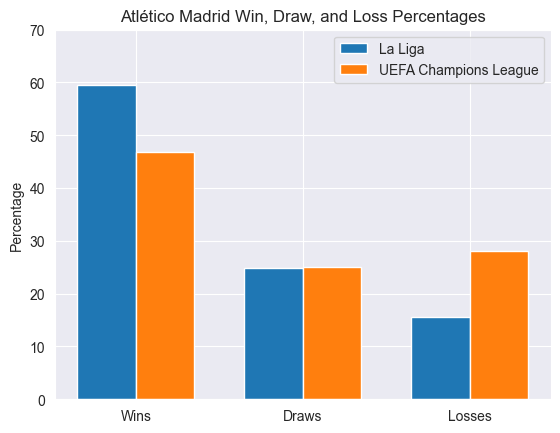

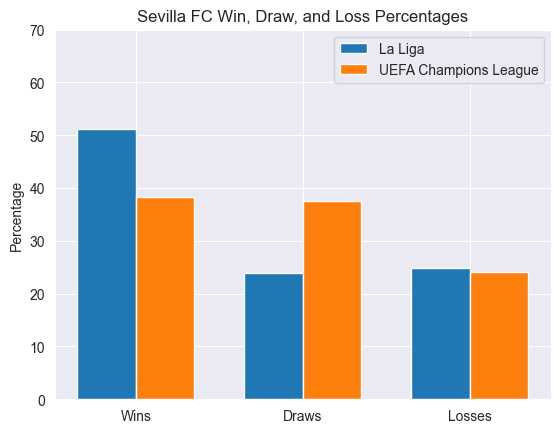

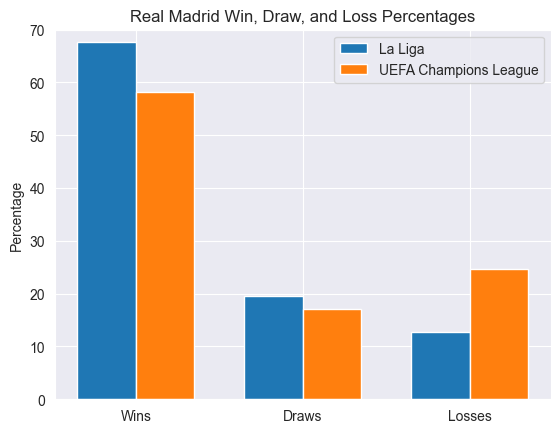

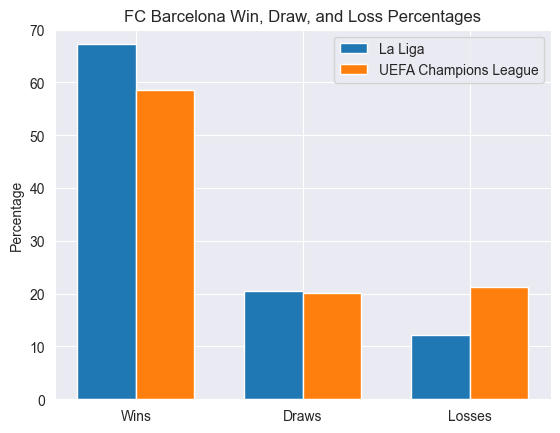

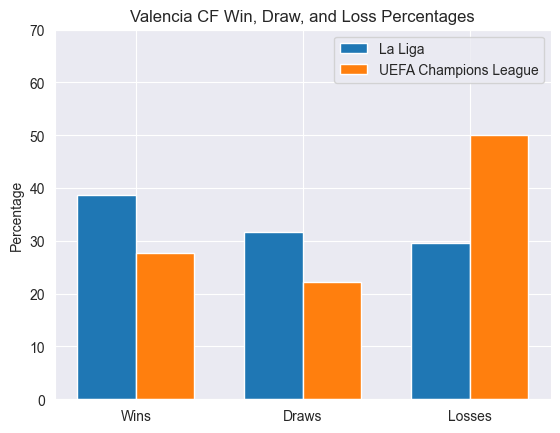

In [4]:
import matplotlib.pyplot as plt

# Ensure DATE_TIME column is datetime type
la_liga_df['DATE_TIME'] = pd.to_datetime(la_liga_df['DATE_TIME'], dayfirst=True)
ucl_df['DATE_TIME'] = pd.to_datetime(ucl_df['DATE_TIME'], dayfirst=True)

# Resto del código...

# Identify common teams
common_teams = set(la_liga_df['HOME_TEAM']).intersection(set(ucl_df['HOME_TEAM']))

# Define a function to calculate win, draw, and loss percentages for a specific team and year
def calculate_percentages(df, team, year):
    # Filter matches for the specified team and year
    team_matches = df[(df['HOME_TEAM'] == team) | (df['AWAY_TEAM'] == team)]
    team_year_matches = team_matches[team_matches['DATE_TIME'].dt.year == year]
    
    # Calculate the number of wins, draws, and losses for the team in the specified year
    home_wins = ((team_year_matches['HOME_TEAM'] == team) & (team_year_matches['HOME_TEAM_SCORE'] > team_year_matches['AWAY_TEAM_SCORE'])).sum()
    away_wins = ((team_year_matches['AWAY_TEAM'] == team) & (team_year_matches['AWAY_TEAM_SCORE'] > team_year_matches['HOME_TEAM_SCORE'])).sum()
    draws = (((team_year_matches['HOME_TEAM'] == team) | (team_year_matches['AWAY_TEAM'] == team)) & (team_year_matches['HOME_TEAM_SCORE'] == team_year_matches['AWAY_TEAM_SCORE'])).sum()
    
    home_losses = ((team_year_matches['HOME_TEAM'] == team) & (team_year_matches['HOME_TEAM_SCORE'] < team_year_matches['AWAY_TEAM_SCORE'])).sum()
    away_losses = ((team_year_matches['AWAY_TEAM'] == team) & (team_year_matches['AWAY_TEAM_SCORE'] < team_year_matches['HOME_TEAM_SCORE'])).sum()
    
    total_matches = home_wins + away_wins + draws + home_losses + away_losses
    win_percentage = (home_wins + away_wins) / total_matches * 100
    draw_percentage = draws / total_matches * 100
    loss_percentage = (home_losses + away_losses) / total_matches * 100
    
    return win_percentage, draw_percentage, loss_percentage

# Plot the bar graphs for each common team
for team in common_teams:
    # Get the years in which the team participated in both La Liga and UEFA Champions League
    common_years = set(la_liga_df[la_liga_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year).intersection(set(ucl_df[ucl_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year))
    
    # Calculate the average percentages for each year
    average_liga_win_percentage = 0
    average_liga_draw_percentage = 0
    average_liga_loss_percentage = 0
    average_ucl_win_percentage = 0
    average_ucl_draw_percentage = 0
    average_ucl_loss_percentage = 0
    
    num_years = len(common_years)
    for year in common_years:
        # Calculate percentages for La Liga
        la_liga_win_percentage, la_liga_draw_percentage, la_liga_loss_percentage = calculate_percentages(la_liga_df, team, year)
        average_liga_win_percentage += la_liga_win_percentage
        average_liga_draw_percentage += la_liga_draw_percentage
        average_liga_loss_percentage += la_liga_loss_percentage
        
        # Calculate percentages for UEFA Champions League
        ucl_win_percentage, ucl_draw_percentage, ucl_loss_percentage = calculate_percentages(ucl_df, team, year)
        average_ucl_win_percentage += ucl_win_percentage
        average_ucl_draw_percentage += ucl_draw_percentage
        average_ucl_loss_percentage += ucl_loss_percentage
    
    # Calculate average percentages
    average_liga_win_percentage /= num_years
    average_liga_draw_percentage /= num_years
    average_liga_loss_percentage /= num_years
    average_ucl_win_percentage /= num_years
    average_ucl_draw_percentage /= num_years
    average_ucl_loss_percentage /= num_years
    
    # Plot the bar graph
    labels = ['Wins', 'Draws', 'Losses']
    liga_percentages = [average_liga_win_percentage, average_liga_draw_percentage, average_liga_loss_percentage]
    ucl_percentages = [average_ucl_win_percentage, average_ucl_draw_percentage, average_ucl_loss_percentage]
    
    x = range(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, liga_percentages, width, label='La Liga')
    rects2 = ax.bar([i + width for i in x], ucl_percentages, width, label='UEFA Champions League')
    
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 70)  # Set the y-axis range from 0 to 70
    ax.set_title(f'{team} Win, Draw, and Loss Percentages')
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(labels)
    ax.legend()
    
    plt.show()


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure DATE_TIME column is datetime type
la_liga_df['DATE_TIME'] = pd.to_datetime(la_liga_df['DATE_TIME'], dayfirst=True)
ucl_df['DATE_TIME'] = pd.to_datetime(ucl_df['DATE_TIME'], dayfirst=True)

# Identify common teams
common_teams = set(la_liga_df['HOME_TEAM']).intersection(set(ucl_df['HOME_TEAM']))

# Define a function to calculate win, draw, and loss percentages for a specific team and year
def calculate_percentages(df, team, year):
    # Filter matches for the specified team and year
    team_matches = df[(df['HOME_TEAM'] == team) | (df['AWAY_TEAM'] == team)]
    team_year_matches = team_matches[team_matches['DATE_TIME'].dt.year == year]
    
    # Calculate the number of wins, draws, and losses for the team in the specified year
    home_wins = ((team_year_matches['HOME_TEAM'] == team) & (team_year_matches['HOME_TEAM_SCORE'] > team_year_matches['AWAY_TEAM_SCORE'])).sum()
    away_wins = ((team_year_matches['AWAY_TEAM'] == team) & (team_year_matches['AWAY_TEAM_SCORE'] > team_year_matches['HOME_TEAM_SCORE'])).sum()
    total_wins = home_wins + away_wins
    
    total_matches = len(team_year_matches)
    
    win_percentage = total_wins / total_matches
    
    return win_percentage

# Calculate the average points for each team in both competitions
average_points_la_liga = {}
average_points_ucl = {}
for team in common_teams:
    # Get the years in which the team participated in both La Liga and UEFA Champions League
    common_years = set(la_liga_df[la_liga_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year).intersection(set(ucl_df[ucl_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year))
    
    points_list_la_liga = []
    points_list_ucl = []
    for year in common_years:
        # Calculate win percentage for La Liga
        win_percentage_la_liga = calculate_percentages(la_liga_df, team, year)
        points_list_la_liga.append(win_percentage_la_liga)
        
        # Calculate win percentage for UEFA Champions League
        win_percentage_ucl = calculate_percentages(ucl_df, team, year)
        points_list_ucl.append(win_percentage_ucl)
    
    # Calculate average points for the team in La Liga
    average_points_la_liga[team] = sum(points_list_la_liga) / len(common_years)
    
    # Calculate average points for the team in UEFA Champions League
    average_points_ucl[team] = sum(points_list_ucl) / len(common_years)

print("Average Points in La Liga:")
print(average_points_la_liga)
print("\nAverage Points in UEFA Champions League:")
print(average_points_ucl)



Average Points in La Liga:
{'Villarreal CF': 0.4303571428571429, 'Atlético Madrid': 0.5960499004284939, 'Sevilla FC': 0.5125011072379493, 'Real Madrid': 0.6763506409772362, 'FC Barcelona': 0.6730059984231999, 'Valencia CF': 0.3867896236317289}

Average Points in UEFA Champions League:
{'Villarreal CF': 0.41666666666666663, 'Atlético Madrid': 0.46825396825396826, 'Sevilla FC': 0.3833333333333333, 'Real Madrid': 0.5820905285190999, 'FC Barcelona': 0.5861111111111111, 'Valencia CF': 0.27777777777777773}


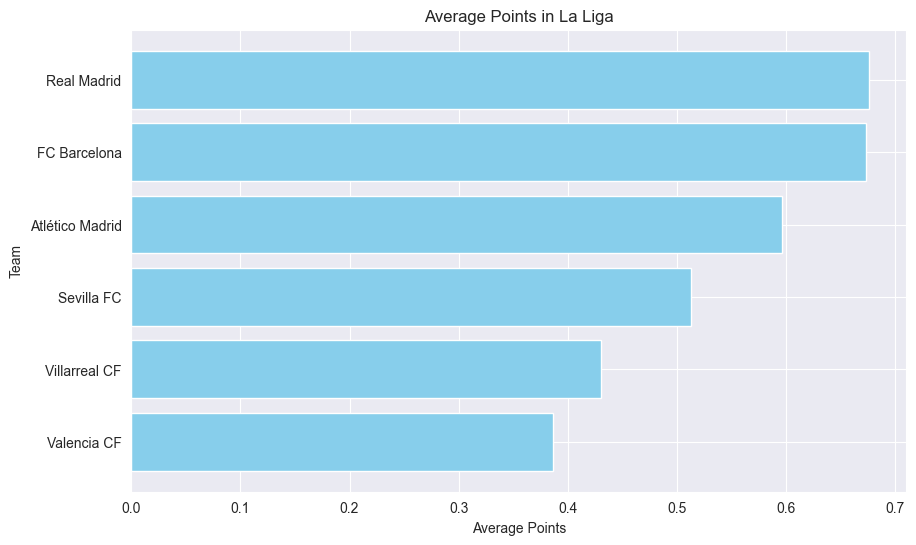

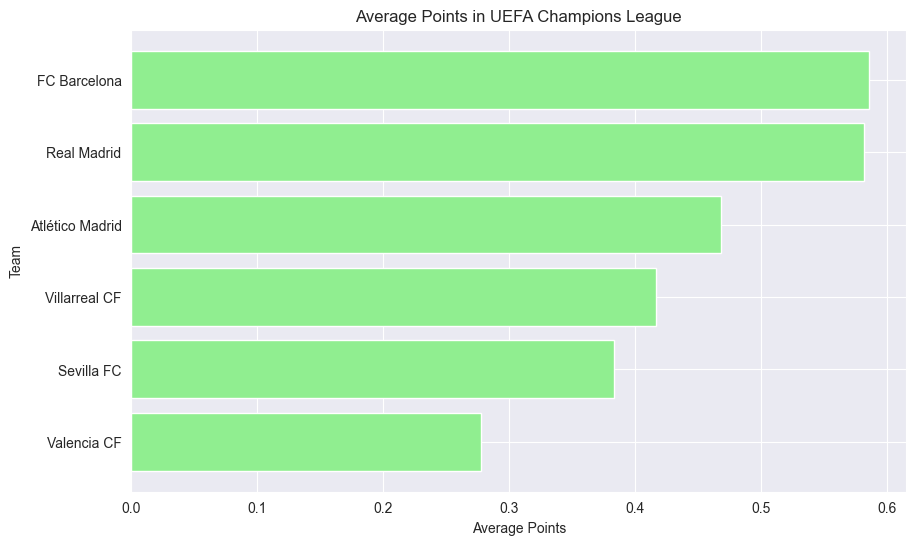

In [6]:
import matplotlib.pyplot as plt

# Ordenar los equipos por sus medias de puntos en La Liga de mayor a menor
sorted_average_points_la_liga = dict(sorted(average_points_la_liga.items(), key=lambda item: item[1], reverse=True))
teams_la_liga = list(sorted_average_points_la_liga.keys())
points_la_liga = list(sorted_average_points_la_liga.values())

# Crear la gráfica de barras para La Liga
plt.figure(figsize=(10, 6))
plt.barh(teams_la_liga, points_la_liga, color='skyblue')
plt.xlabel('Average Points')
plt.ylabel('Team')
plt.title('Average Points in La Liga')
plt.gca().invert_yaxis()  # Invertir el eje y para que el equipo con más puntos esté arriba
plt.show()

# Ordenar los equipos por sus medias de puntos en la UEFA Champions League de mayor a menor
sorted_average_points_ucl = dict(sorted(average_points_ucl.items(), key=lambda item: item[1], reverse=True))
teams_ucl = list(sorted_average_points_ucl.keys())
points_ucl = list(sorted_average_points_ucl.values())

# Crear la gráfica de barras para la UEFA Champions League
plt.figure(figsize=(10, 6))
plt.barh(teams_ucl, points_ucl, color='lightgreen')
plt.xlabel('Average Points')
plt.ylabel('Team')
plt.title('Average Points in UEFA Champions League')
plt.gca().invert_yaxis()  # Invertir el eje y para que el equipo con más puntos esté arriba
plt.show()


Hipótesis nula (H0): No hay diferencia significativa en el desempeño de los equipos en semanas con y sin partidos de la UCL en La Liga.

Hipótesis alternativa (H1): Hay una diferencia significativa en el desempeño de los equipos en semanas con y sin partidos de la UCL en La Liga.


In [7]:
import pandas as pd

# Supongamos que tenemos DataFrames "la_liga_df" y "ucl_df" con columnas "DATE_TIME" para las fechas de los partidos

# 1. Ordenar ambos DataFrames por fecha
la_liga_df = la_liga_df.sort_values(by='DATE_TIME')
ucl_df = ucl_df.sort_values(by='DATE_TIME')

# 2. Crear una lista de fechas de los partidos de la UCL
ucl_dates = ucl_df['DATE_TIME'].tolist()

# 3. Iterar a través de los partidos de La Liga y comprobar si hay un partido de la UCL entre los partidos de La Liga
ucl_weeks = []
for idx, row in la_liga_df.iterrows():
    current_date = row['DATE_TIME']
    # Comprobar si hay un partido de la UCL entre los partidos de La Liga
    if any(current_date < date for date in ucl_dates):
        ucl_weeks.append(1)  # Indicar que hay partidos de UCL en esta semana
    else:
        ucl_weeks.append(0)  # Indicar que no hay partidos de UCL en esta semana

# 4. Crear una nueva columna en el DataFrame de La Liga para indicar si hay partidos de la UCL en cada semana
la_liga_df['UCL_match'] = ucl_weeks

# 5. Obtener una lista de equipos que han participado en ambas competiciones
common_teams = set(la_liga_df['HOME_TEAM']).intersection(set(ucl_df['HOME_TEAM']))

# 6. Filtrar los partidos de La Liga y de la UCL para incluir solo los de los equipos comunes
la_liga_with_common_teams = la_liga_df[(la_liga_df['HOME_TEAM'].isin(common_teams)) | (la_liga_df['AWAY_TEAM'].isin(common_teams))]
ucl_with_common_teams = ucl_df[(ucl_df['HOME_TEAM'].isin(common_teams)) | (ucl_df['AWAY_TEAM'].isin(common_teams))]

# Dividir los datos de La Liga en semanas con y sin partidos de la UCL
la_liga_with_ucl = la_liga_with_common_teams[la_liga_with_common_teams['UCL_match'] == 1]
la_liga_without_ucl = la_liga_with_common_teams[la_liga_with_common_teams['UCL_match'] == 0]


In [8]:
print(la_liga_with_ucl)
print(la_liga_without_ucl)

       Season  DATE_TIME        HOME_TEAM        AWAY_TEAM  HOME_TEAM_SCORE  \
0     2015-16 2016-01-02  Atlético Madrid          Levante                1   
1     2015-16 2016-01-02          Espanol     FC Barcelona                0   
5     2015-16 2016-01-03          Granada       Sevilla FC                2   
6     2015-16 2016-01-03        La Coruna    Villarreal CF                1   
7     2015-16 2016-01-03      Valencia CF      Real Madrid                2   
...       ...        ...              ...              ...              ...   
2481  2021-22 2022-05-20      Real Madrid            Betis                0   
2483  2021-22 2022-05-21      Valencia CF            Celta                2   
2490  2021-22 2022-05-22         Sociedad  Atlético Madrid                1   
2488  2021-22 2022-05-22     FC Barcelona    Villarreal CF                0   
2489  2021-22 2022-05-22       Sevilla FC       Ath Bilbao                1   

      AWAY_TEAM_SCORE FTR  HTHG  HTAG HTR  UCL_matc

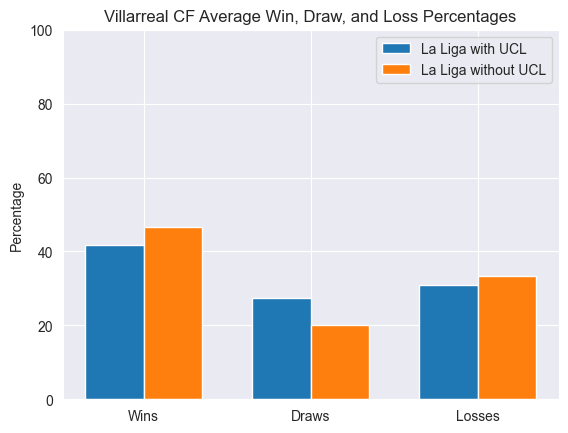

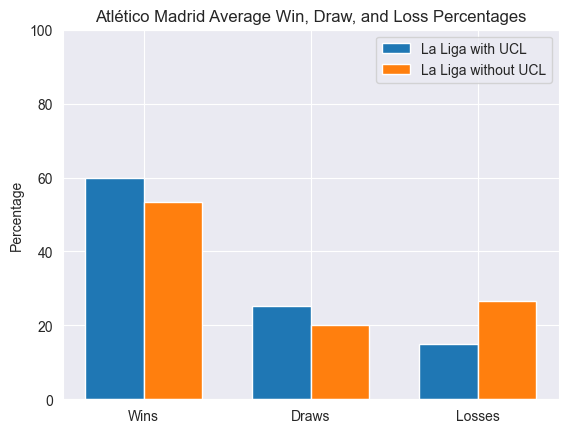

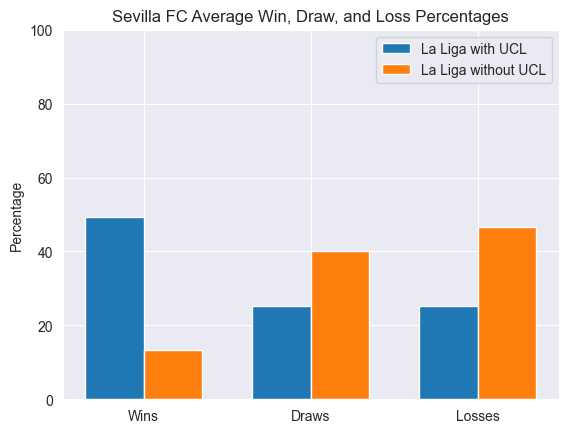

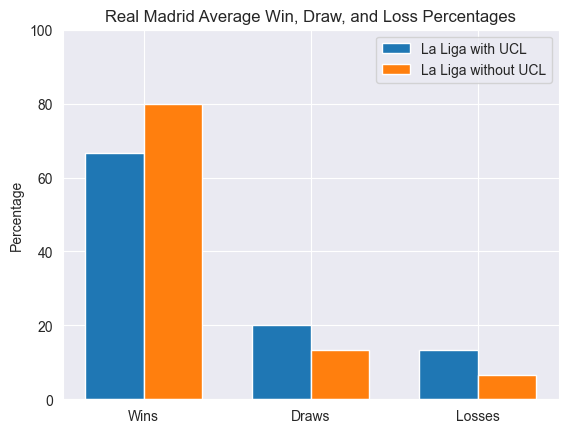

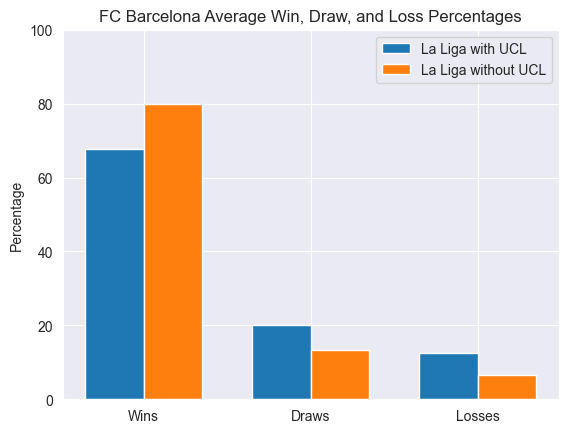

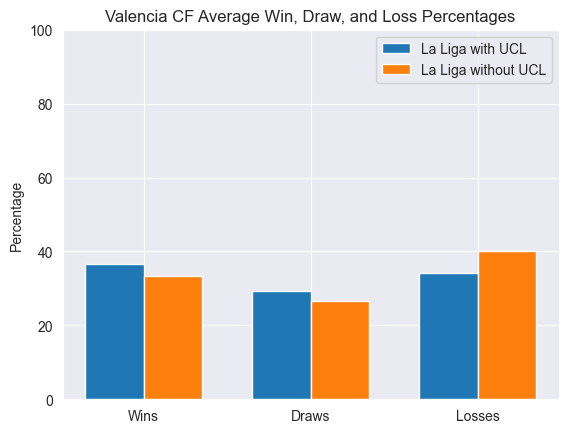

In [9]:
import matplotlib.pyplot as plt

# Define a function to calculate win, draw, and loss percentages for a specific team and dataframe
def calculate_percentages(df, team, ucl_years):
    team_df = df[(df['HOME_TEAM'] == team) | (df['AWAY_TEAM'] == team)]
    team_ucl_years_df = team_df[team_df['DATE_TIME'].dt.year.isin(ucl_years)]
    
    total_matches = len(team_ucl_years_df)
    home_wins = ((team_ucl_years_df['HOME_TEAM'] == team) & (team_ucl_years_df['HOME_TEAM_SCORE'] > team_ucl_years_df['AWAY_TEAM_SCORE'])).sum()
    away_wins = ((team_ucl_years_df['AWAY_TEAM'] == team) & (team_ucl_years_df['AWAY_TEAM_SCORE'] > team_ucl_years_df['HOME_TEAM_SCORE'])).sum()
    draws = (((team_ucl_years_df['HOME_TEAM'] == team) | (team_ucl_years_df['AWAY_TEAM'] == team)) & (team_ucl_years_df['HOME_TEAM_SCORE'] == team_ucl_years_df['AWAY_TEAM_SCORE'])).sum()
    home_losses = ((team_ucl_years_df['HOME_TEAM'] == team) & (team_ucl_years_df['HOME_TEAM_SCORE'] < team_ucl_years_df['AWAY_TEAM_SCORE'])).sum()
    away_losses = ((team_ucl_years_df['AWAY_TEAM'] == team) & (team_ucl_years_df['AWAY_TEAM_SCORE'] < team_ucl_years_df['HOME_TEAM_SCORE'])).sum()
    
    win_percentage = ((home_wins + away_wins) / total_matches) * 100
    draw_percentage = (draws / total_matches) * 100
    loss_percentage = ((home_losses + away_losses) / total_matches) * 100
    
    return win_percentage, draw_percentage, loss_percentage

# Plot the bar graphs for each common team
for team in common_teams:
    # Get the years in which the team participated in both La Liga with UCL and La Liga without UCL
    ucl_years = set(la_liga_with_ucl[la_liga_with_ucl['HOME_TEAM'] == team]['DATE_TIME'].dt.year)
    
    # Calculate the average percentages for La Liga with UCL
    liga_with_ucl_win_percentage, liga_with_ucl_draw_percentage, liga_with_ucl_loss_percentage = calculate_percentages(la_liga_with_ucl, team, ucl_years)
    
    # Calculate the average percentages for La Liga without UCL
    liga_without_ucl_win_percentage, liga_without_ucl_draw_percentage, liga_without_ucl_loss_percentage = calculate_percentages(la_liga_without_ucl, team, ucl_years)
    
    # Plot the bar graph
    labels = ['Wins', 'Draws', 'Losses']
    percentages_with_ucl = [liga_with_ucl_win_percentage, liga_with_ucl_draw_percentage, liga_with_ucl_loss_percentage]
    percentages_without_ucl = [liga_without_ucl_win_percentage, liga_without_ucl_draw_percentage, liga_without_ucl_loss_percentage]
    
    x = range(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, percentages_with_ucl, width, label='La Liga with UCL')
    rects2 = ax.bar([i + width for i in x], percentages_without_ucl, width, label='La Liga without UCL')
    
    ax.set_ylabel('Percentage')
    ax.set_ylim(0,100)
    ax.set_title(f'{team} Average Win, Draw, and Loss Percentages')
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(labels)
    ax.legend()
    
    plt.show()




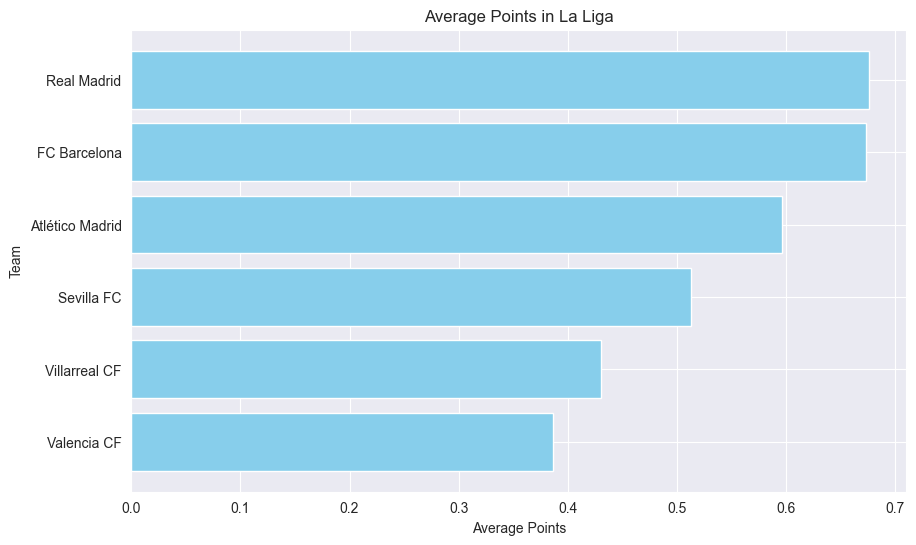

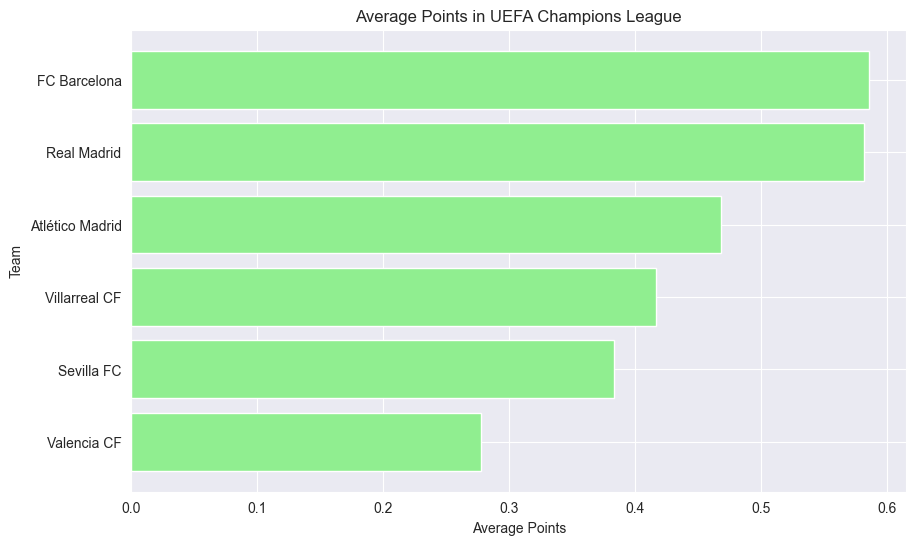

In [18]:
import matplotlib.pyplot as plt

# Example data
teams_la_liga = list(sorted_average_points_la_liga.keys())
points_la_liga = list(sorted_average_points_la_liga.values())

# Create a horizontal bar plot for La Liga
plt.figure(figsize=(10, 6))
plt.barh(teams_la_liga, points_la_liga, color='skyblue')
plt.xlabel('Average Points')
plt.ylabel('Team')
plt.title('Average Points in La Liga')
plt.gca().invert_yaxis()  # Invert the y-axis so that the team with the most points is at the top
plt.show()

# Example data for UEFA Champions League
teams_ucl = list(sorted_average_points_ucl.keys())
points_ucl = list(sorted_average_points_ucl.values())

# Create a horizontal bar plot for UEFA Champions League
plt.figure(figsize=(10, 6))
plt.barh(teams_ucl, points_ucl, color='lightgreen')
plt.xlabel('Average Points')
plt.ylabel('Team')
plt.title('Average Points in UEFA Champions League')
plt.gca().invert_yaxis()  # Invert the y-axis so that the team with the most points is at the top
plt.show()


In [10]:
import matplotlib.pyplot as plt

# Define a function to calculate average points for a specific team and dataframe
def calculate_average_points(df, team, ucl_years):
    team_df = df[(df['HOME_TEAM'] == team) | (df['AWAY_TEAM'] == team)]
    team_ucl_years_df = team_df[team_df['DATE_TIME'].dt.year.isin(ucl_years)]
    
    total_matches = len(team_ucl_years_df)
    total_wins = ((team_ucl_years_df['HOME_TEAM'] == team) & (team_ucl_years_df['HOME_TEAM_SCORE'] > team_ucl_years_df['AWAY_TEAM_SCORE'])).sum() + ((team_ucl_years_df['AWAY_TEAM'] == team) & (team_ucl_years_df['AWAY_TEAM_SCORE'] > team_ucl_years_df['HOME_TEAM_SCORE'])).sum()
    
    win_percentage = total_wins / total_matches
    average_points = win_percentage * 3
    
    return average_points

# Plot the bar graphs for each common team
for team in common_teams:
    # Get the years in which the team participated in both La Liga with UCL and La Liga without UCL
    ucl_years = set(la_liga_with_ucl[la_liga_with_ucl['HOME_TEAM'] == team]['DATE_TIME'].dt.year)
    
    # Calculate the average points for La Liga with UCL
    liga_with_ucl_average_points = calculate_average_points(la_liga_with_ucl, team, ucl_years)
    
    # Calculate the average points for La Liga without UCL
    liga_without_ucl_average_points = calculate_average_points(la_liga_without_ucl, team, ucl_years)
    
    print(f'{team}: Average Points (with UCL): {liga_with_ucl_average_points:.2f}, Average Points (without UCL): {liga_without_ucl_average_points:.2f}')



Villarreal CF: Average Points (with UCL): 1.25, Average Points (without UCL): 1.40
Atlético Madrid: Average Points (with UCL): 1.80, Average Points (without UCL): 1.60
Sevilla FC: Average Points (with UCL): 1.48, Average Points (without UCL): 0.40
Real Madrid: Average Points (with UCL): 2.00, Average Points (without UCL): 2.40
FC Barcelona: Average Points (with UCL): 2.03, Average Points (without UCL): 2.40
Valencia CF: Average Points (with UCL): 1.10, Average Points (without UCL): 1.00


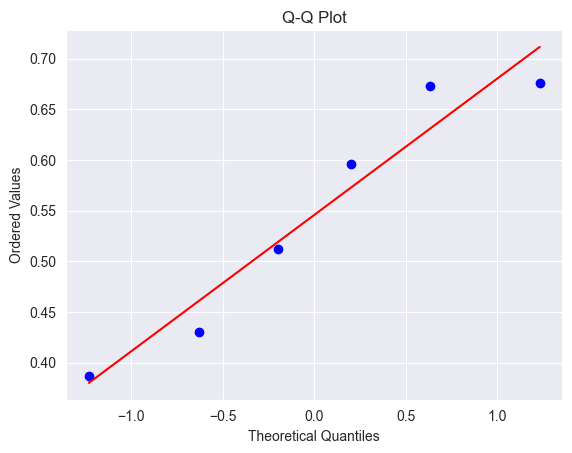

Shapiro-Wilk Statistic (Normal Win Rates): 0.9072447532126109
p-value (Normal Win Rates): 0.41851956259726353
The data follows a normal distribution.


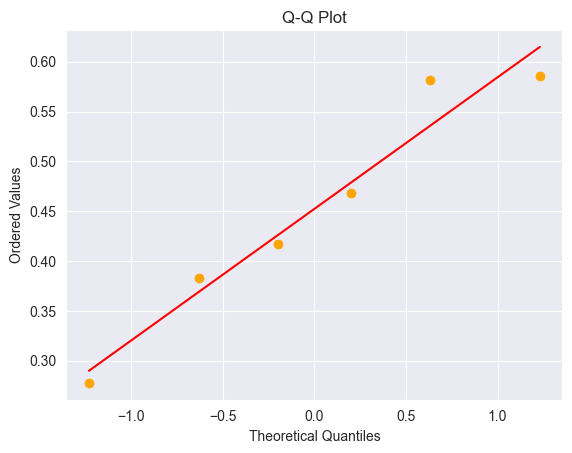

Shapiro-Wilk Statistic (Win Rates with Champions League matches): 0.9354053384479911
p-value (Win Rates with Champions League matches): 0.6224412540057032
The data follows a normal distribution.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot

def visual_normality_test(data, color):
    # Create Q-Q plot
    probplot(data, plot=plt)
    plt.title('Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.gca().get_lines()[0].set_color(color)
    plt.show()

# Example data
normal_win_rate = np.array(normal_points)  # Normal win rates in La Liga
champions_win_rate = np.array(ucl_points)  # Win rates in La Liga with UCL matches

# Visual normality test for normal win rates
visual_normality_test(normal_win_rate, 'blue')

# Shapiro-Wilk test for normal win rates
sw_statistic, p_value = shapiro(normal_win_rate)
print('Shapiro-Wilk Statistic (Normal Win Rates):', sw_statistic)
print('p-value (Normal Win Rates):', p_value)
if p_value > 0.05:
    print('The data follows a normal distribution.')
else:
    print('The data does not follow a normal distribution.')

# Visual normality test for win rates with Champions League matches
visual_normality_test(champions_win_rate, 'orange')

# Shapiro-Wilk test for win rates with Champions League matches
sw_statistic1, p_value1 = shapiro(champions_win_rate)
print('Shapiro-Wilk Statistic (Win Rates with Champions League matches):', sw_statistic1)
print('p-value (Win Rates with Champions League matches):', p_value1)
if p_value1 > 0.05:
    print('The data follows a normal distribution.')
else:
    print('The data does not follow a normal distribution.')


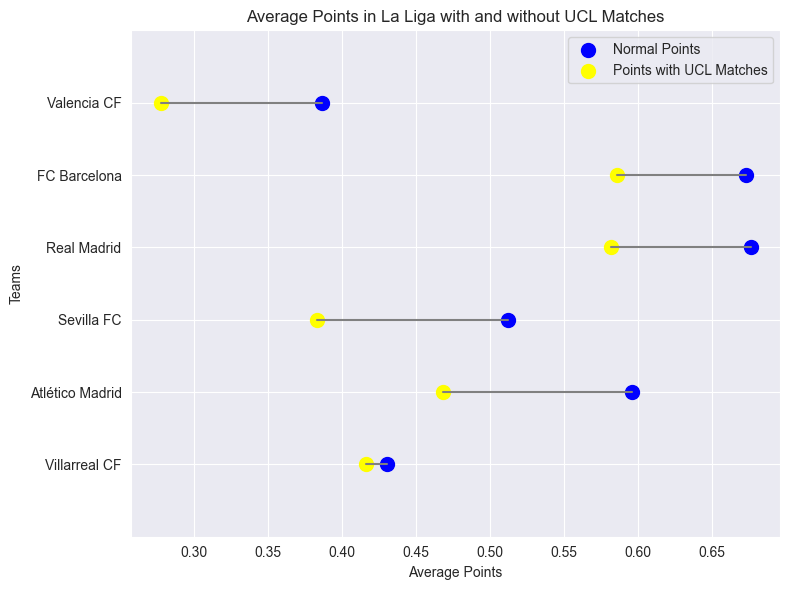

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
teams = list(average_points_la_liga.keys())  # Use the teams from your data
normal_points = list(average_points_la_liga.values())  # Normal points in La Liga
ucl_points = list(average_points_ucl.values())  # Points in La Liga with UCL matches

# Set figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Set y-axis limits
ax.set_ylim(-1, len(teams))

# Plot lollipop markers for normal points
ax.scatter(normal_points, range(len(teams)), color='blue', marker='o', s=100, label='Normal Points')

# Plot lollipop markers for points with UCL matches
ax.scatter(ucl_points, range(len(teams)), color='yellow', marker='o', s=100, label='Points with UCL Matches')

# Plot lines connecting normal and UCL points
for i in range(len(teams)):
    ax.plot([normal_points[i], ucl_points[i]], [i, i], color='gray')

# Set y-axis tick labels
ax.set_yticks(range(len(teams)))
ax.set_yticklabels(teams)

# Set labels and title
ax.set_xlabel('Average Points')
ax.set_ylabel('Teams')
ax.set_title('Average Points in La Liga with and without UCL Matches')

# Set legend
ax.legend()

# Adjust layout
plt.tight_layout()

# Show the graph
plt.show()


In [12]:
import scipy.stats as stats

# Convert dictionary values to arrays
la_liga_points_array = list(average_points_la_liga.values())
ucl_points_array = list(average_points_ucl.values())

# Compute the paired t-test
t_statistic, p_value = stats.ttest_rel(la_liga_points_array, ucl_points_array)

# Define significance level
alpha = 0.05

# Print the results
print("Paired t-test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in the performance of La Liga teams with and without UCL matches.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the performance of La Liga teams with and without UCL matches.")


Paired t-test Results:
T-Statistic: 5.3659507156874175
P-Value: 0.003024656432445103
Reject the null hypothesis. There is a statistically significant difference in the performance of La Liga teams with and without UCL matches.
